### Jupyterlab magic
Spodnja celica uvozi vse knjižnice (mogoče tudi kakšno preveč) in pripravi nastavitve, ki jih potrebujemo kasneje za računanje in risanje. Poženi pred čemerkoli drugim

In [89]:
import IPython.display as ipd
from math import pi
from numpy import *
from scipy.stats import norm
from scipy.constants import *
from scipy.io import wavfile
from scipy.signal import iirfilter
from scipy.signal import sosfreqz
from scipy.signal import sosfilt
from ipywidgets import *
from matplotlib import pyplot as plt
from matplotlib import rcParams as MpRcParams
MpRcParams['mathtext.fontset'] = 'cm'
MpRcParams['mathtext.rm'] = 'serif'
MpRcParams['mathtext.rm'] = 'serif'
%matplotlib inline

# Ozkopasovni signal + dodatni frekvenčni pasovi za izboljšanje kakovosti

Signal lahko razdelimo tudi po frekvenčnih pasovih in prenašamo osnovni pas (tipično 300 Hz do 3.4 kHz), če trenutne razmere v omrežju omogočajo, pa lahko dodamo še druge pasove za izboljšanje kakovosti zvoka.

Na izhodu (na sprejemniku) signale enostavno seštejemo.


<ipython-input-169-a7ebe3b672ee>:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, sound_data = wavfile.read('PrimerGovora15-22k.wav')


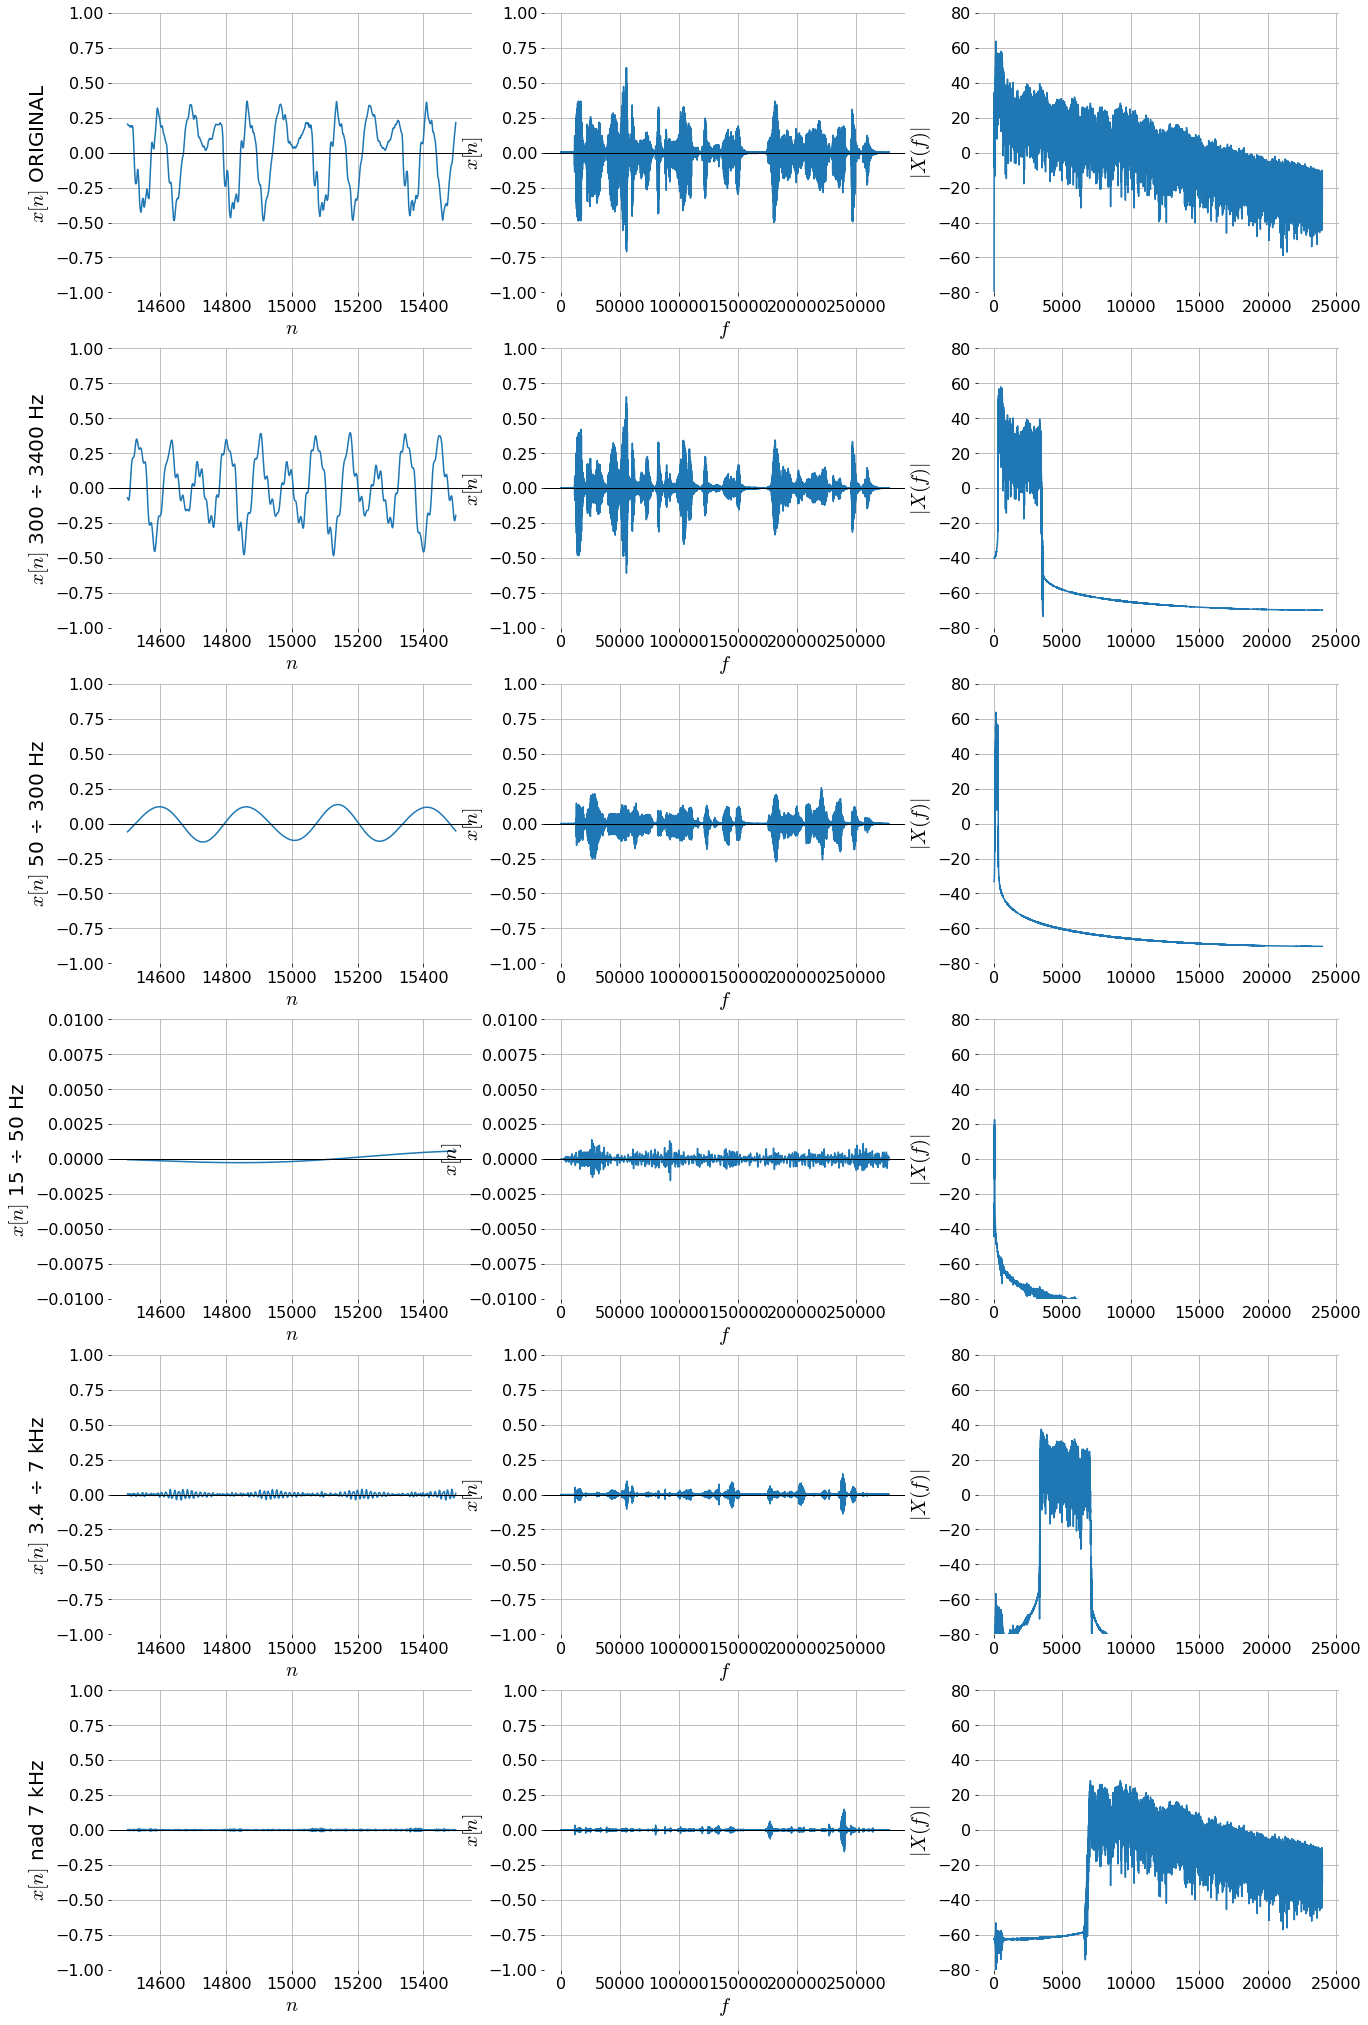

In [169]:
#preberi signal
samplerate, sound_data = wavfile.read('PrimerGovora15-22k.wav')
#in uporabi samo en kanal
if size(sound_data.shape) > 1: 
    x=sound_data[:,0]
else:
    x=sound_data

#pripravi frekvenčno os za risanje grafov
fX=fft.rfftfreq(x.size)*samplerate   

#izračunaj spekter signala
X=fft.rfft(x)

#nacrtaj posamezne filtre in razdeli signal po delih spektra
sos = iirfilter(16, [300, 3400], rp=.1, rs=120, btype='bandpass', analog=False, ftype='ellip', output='sos', fs=samplerate)
w, h = sosfreqz(sos, worN=10000)
x300_3400 = sosfilt(sos, x)
X300_3400 = fft.rfft(x300_3400)

sos = iirfilter(16, [15, 50], rp=3, rs=120, btype='bandpass', analog=False, ftype='ellip', output='sos', fs=samplerate)
x15_50 = sosfilt(sos, x)
X15_50 = fft.rfft(x15_50)

sos = iirfilter(16, [50, 300], rp=.1, rs=120, btype='bandpass', analog=False, ftype='ellip', output='sos', fs=samplerate)
x50_300 = sosfilt(sos, x)
X50_300 = fft.rfft(x50_300)

sos = iirfilter(16, [3400, 7000], rp=.1, rs=120, btype='bandpass', analog=False, ftype='ellip', output='sos', fs=samplerate)
x3400_7000 = sosfilt(sos, x)
X3400_7000 = fft.rfft(x3400_7000)

sos = iirfilter(16, [7000], rp=.1, rs=120, btype='highpass', analog=False, ftype='ellip', output='sos', fs=samplerate)
x7000_ = sosfilt(sos, x)
X7000_ = fft.rfft(x7000_)


#Risanje
seg_start=14500
seg_len=1000
fig, ax = plt.subplots(6,3,figsize=(22,36))

ax[0,0].set_ylabel(r'$x[n]$ ORIGINAL', fontsize=20)
ax[0,0].plot(arange(seg_start,seg_start+seg_len),x[seg_start:seg_start+seg_len])
ax[0,1].plot(x)
ax[0,2].plot(fX,20*log10(absolute(X)))

ax[1,0].set_ylabel(r'$x[n]$ 300 ÷ 3400 Hz', fontsize=20)
ax[1,0].plot(arange(seg_start,seg_start+seg_len),x300_3400[seg_start:seg_start+seg_len])
ax[1,1].plot(x300_3400)
ax[1,2].plot(fX,20*log10(absolute(X300_3400)))

ax[2,0].set_ylabel(r'$x[n]$ 50 ÷ 300 Hz', fontsize=20)
ax[2,0].plot(arange(seg_start,seg_start+seg_len),x50_300[seg_start:seg_start+seg_len])
ax[2,1].plot(x50_300)
ax[2,2].plot(fX,20*log10(absolute(X50_300)))

ax[3,0].set_ylabel(r'$x[n]$ 15 ÷ 50 Hz', fontsize=20)
ax[3,0].plot(arange(seg_start,seg_start+seg_len),x15_50[seg_start:seg_start+seg_len])
ax[3,1].plot(x15_50)
ax[3,2].plot(fX,20*log10(absolute(X15_50)))

ax[4,0].set_ylabel(r'$x[n]$ 3.4 ÷ 7 kHz', fontsize=20)
ax[4,0].plot(arange(seg_start,seg_start+seg_len),x3400_7000[seg_start:seg_start+seg_len])
ax[4,1].plot(x3400_7000)
ax[4,2].plot(fX,20*log10(absolute(X3400_7000)))

ax[5,0].set_ylabel(r'$x[n]$ nad 7 kHz', fontsize=20)
ax[5,0].plot(arange(seg_start,seg_start+seg_len),x7000_[seg_start:seg_start+seg_len])
ax[5,1].plot(x7000_)
ax[5,2].plot(fX,20*log10(absolute(X7000_)))



for i in range(0,6):
    ax[i,0].set_ylim([-1,1])
    ax[i,1].set_ylim([-1,1])
    ax[i,2].set_ylim([-80,80])
    ax[i,0].axhline(0, color='black', lw=1)
    ax[i,1].axhline(0, color='black', lw=1)
    ax[i,0].set_xlabel(r'$n$', fontsize=20)
    ax[i,1].set_xlabel(r'$n$', fontsize=20)
    ax[i,1].set_xlabel(r'$f$', fontsize=20)
    ax[i,1].set_ylabel(r'$x[n]$', fontsize=20)
    ax[i,2].set_ylabel(r'$|X(f)|$', fontsize=20)
    for j in range(0,3):
        ax[i,j].grid(which="both")
        ax[i,j].set_frame_on(False)

ax[3,0].set_ylim([-0.01,0.01])
ax[3,1].set_ylim([-0.01,0.01])

plt.rc('ytick', labelsize=16)
plt.rc('xtick', labelsize=16) 

# Play Audio

In [170]:
ipd.Audio(x300_3400,rate=samplerate)

In [171]:
ipd.Audio(x300_3400+x50_300,rate=samplerate)

In [172]:
ipd.Audio(x300_3400+x50_300+x3400_7000,rate=samplerate)

In [173]:
ipd.Audio(x300_3400+x3400_7000,rate=samplerate)

In [174]:
ipd.Audio(x15_50,rate=samplerate)

-0.70794576